# Embedded Methods

## Theory

If a feature's absolute coefficient is greater than the mean, it suggests that the feature is more important than the "average" feature.
If it's less than or equal to the mean, it means the feature is less important than the average.

Use L1 (Lasso) if you suspect that only a few features are important and you want the model to automatically select the most relevant features by setting the rest to zero.

Use L2 (Ridge) if you believe that most features contribute to the model, but you want to shrink their impact to avoid overfitting.

* Smaller C values - **Stronger regularization**
* Larger C values - **Weaker regularization**

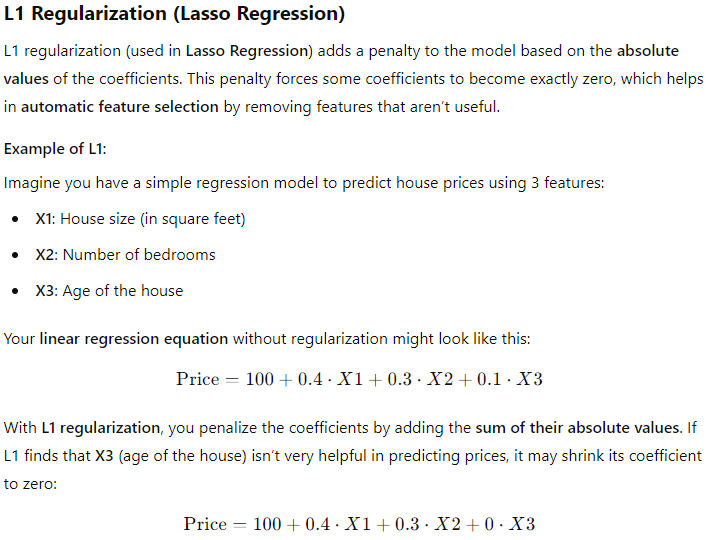

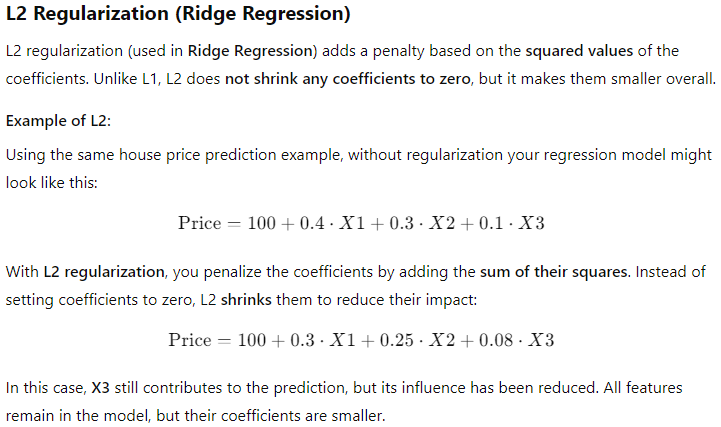

## Logistic Regression Coefficients


Linear regression predicts a quantitative response Y on the basis of predictor variables X1, X2, ... Xn. It assumes that there is a linear relationship between X(s) and Y. Mathematically, we write this linear relationship as Y ≈ β0 + β1X1 + β2X2 + ... + βnXn.

The magnitude of the coefficients is directly influenced by the scale of the features. Therefore, to compare coefficients across features, it is important that all features are on a similar scale. This is why normalisation is important for variable importance and feature selection in linear models.

* Linear Regression makes the following assumptions:
* There is a linear relationship betweent the predictors Xs and the outcome Y
* The residuals follow a normal distribution centered at 0
* There is little or no multicollinearity among predictors (Xs should not be linearly related to one another)
* Homoscedasticity (variance should be the same)

**Personally, this is not my feature selection method of choice, although I find it useful to interpret the output of the model.**



### Initial steps

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Step 1: Separate train and test sets
# This splits the dataset into training and testing subsets for model evaluation.
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

# Step 2: Check the shape of the train and test sets
# This retrieves the dimensions of the training and testing feature sets.
X_train.shape, X_test.shape

# Step 3: Initialize the scaler
# This prepares a StandardScaler to standardize the feature values.
scaler = StandardScaler()

# Step 4: Fit the scaler on the training data
# This computes the mean and standard deviation from the training data for scaling.
scaler.fit(X_train)

### Implementation

In [ ]:
# Step 1: Specify the Logistic Regression model with high C
# This initializes a Logistic Regression model with strong regularization avoidance.
sel_ = SelectFromModel(
    LogisticRegression(
        C=1000,               # High value to reduce the effect of regularization
        penalty='l2',         # Ridge regularization (default) to penalize large coefficients
        max_iter=300,         # Maximum number of iterations for convergence
        random_state=10))     # Seed for reproducibility

# Step 2: Fit the model and select features
# This fits the model to the scaled training data and selects features based on coefficient magnitude.
sel_.fit(scaler.transform(X_train), y_train)

# Step 3: Get the support mask for selected features
# This retrieves a boolean array indicating which features were selected by the model.
sel_.get_support()

# Step 4: Identify selected feature names and count them
# This extracts the names of the selected features and counts how many were chosen.
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

# Step 5: Access the coefficients of the variables
# This retrieves the coefficients from the fitted model for all features.
sel_.estimator_.coef_

# Step 6: Calculate the mean of the coefficients
# This computes the average of the coefficients to determine the selection threshold.
sel_.estimator_.coef_.mean()

### Visualize

The absolute value of the coefficients inform about the importance of the feature on the outcome, and not the sign. Therefore, the feature selection is done filtering on absolute values of coefficients.

X-axis (Coefficients): Shows how important each feature is for predicting the target. Bigger numbers mean more important features.

In [ ]:
# Step 1: Calculate the mean of the absolute coefficients
# This computes the average of the absolute values of the coefficients to assess feature importance.
np.abs(sel_.estimator_.coef_).mean()

# Step 2: Plot the histogram of absolute coefficients
# This visualizes the distribution of the absolute values of the coefficients.
pd.Series(np.abs(sel_.estimator_.coef_).ravel()).hist(bins=20)
plt.xlabel('Coefficients')                      # Label for the x-axis
plt.ylabel('Number of variables')               # Label for the y-axis
plt.show()                                      # Display the plot

# Step 3: Print the total number of features
# This shows the total number of features in the training set.
print('total features: {}'.format((X_train.shape[1])))

# Step 4: Print the number of selected features
# This displays how many features were selected by the model.
print('selected features: {}'.format(len(selected_feat)))

# Step 5: Compare selected features with coefficients above the mean
# This counts how many features have coefficients greater than the mean of absolute coefficients.
print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(
            np.abs(sel_.estimator_.coef_) > np.abs(
                sel_.estimator_.coef_).mean())))
)

Therefore, we see how select from model works. It will select all the coefficients which absolute values are greater than the mean.



##Linear Regression Coefficients


### Initial steps

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

# Step 1: Define numeric data types
# This specifies the numeric data types to select from the dataset.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Step 2: Select numerical columns from the dataset
# This creates a list of numerical columns based on the specified data types.
numerical_vars = list(data.select_dtypes(include=numerics).columns)

# Step 3: Filter the dataset to keep only numerical variables
# This reduces the dataset to include only the selected numerical columns.
data = data[numerical_vars]

# Step 4: Check the shape of the filtered dataset
# This retrieves the dimensions of the dataset after filtering.
data.shape

# Step 5: Separate train and test sets
# This splits the dataset into training and testing subsets for model evaluation.
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),  # Features (excluding target)
    data['SalePrice'],                         # Target variable
    test_size=0.3,                            # 30% of data for testing
    random_state=0)                           # Seed for reproducibility
)

# Step 6: Check the shape of the train and test sets
# This retrieves the dimensions of the training and testing feature sets.
X_train.shape, X_test.shape

# Step 7: Fill missing values in training and testing sets
# This replaces missing values with 0 in both the training and testing datasets.
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Step 8: Initialize the scaler for feature scaling
# This prepares a StandardScaler to standardize the feature values.
scaler = StandardScaler()

# Step 9: Fit the scaler on the training data
# This computes the mean and standard deviation from the training data for scaling.
scaler.fit(X_train)

### Implementation

In [ ]:
# Step 1: Initialize the Linear Regression model for feature selection
# This prepares a Linear Regression model, which does not use regularization.
sel_ = SelectFromModel(LinearRegression())

# Step 2: Fit the model and select features
# This fits the model to the scaled training data and selects features based on coefficient magnitude.
sel_.fit(scaler.transform(X_train), y_train)

# Step 3: Count the number of selected variables
# This retrieves the names of the selected features and counts how many were chosen.
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

### Visualize

In [ ]:
# Step 1: Plot the histogram of absolute coefficients
# This visualizes the distribution of the absolute values of the coefficients.
pd.Series(np.abs(sel_.estimator_.coef_).ravel()).hist(bins=10)
plt.xlabel('Coefficients')                      # Label for the x-axis
plt.ylabel('Number of variables')               # Label for the y-axis
plt.show()                                      # Display the plot

# Step 2: Print the total number of features
# This shows the total number of features in the training set.
print('total features: {}'.format((X_train.shape[1])))

# Step 3: Print the number of selected features
# This displays how many features were selected by the model.
print('selected features: {}'.format(len(selected_feat)))

# Step 4: Compare selected features with coefficients above the mean
# This counts how many features have coefficients greater than the mean of absolute coefficients.
print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(
            np.abs(sel_.estimator_.coef_) > np.abs(
                sel_.estimator_.coef_).mean())))
)

## Regression Coefficients are affected by regularisation

Regularisation applies a penalty on the coefficients, in order to reduce their influence and create models that generalise better. This is very good to improve model performance. **However, it masks the true relationship between the predictor X and the outcome Y.**

**In general, stronger regularisation returns smaller coefficients**

In [ ]:
# Step 1: Initialize the StandardScaler
# This prepares the scaler to standardize the training data.
scaler = StandardScaler()

# Step 2: Fit the scaler on the training data
# This calculates the mean and standard deviation to scale the data.
scaler.fit(X_train)

# Step 3: Initialize an empty list to store coefficients
# This will hold the coefficients of each model we train.
coefs_df = []

# Step 4: Set the list of penalties (C values) for regularization
# This specifies different levels of regularization to be tested, with higher C meaning less regularization.
penalties = [0.00005, 0.0005, 0.005, 0.05, 0.5]

# Step 5: Loop through each penalty and train a Logistic Regression model
for c in penalties:

    # Step 6: Initialize the Logistic Regression model
    # This creates a logistic regression model with the specified penalty (C value).
    logit = LogisticRegression(C=c, penalty='l2', random_state=10, max_iter=300)

    # Step 7: Fit the model on the scaled training data
    # This trains the model using the standardized features and target labels.
    logit.fit(scaler.transform(X_train), y_train)

    # Step 8: Store the model coefficients in the list
    # This saves the coefficients from the trained model into coefs_df.
    coefs_df.append(pd.Series(logit.coef_.ravel()))

# Step 9: Create a DataFrame of the coefficients for each model
# This combines the coefficients from all models into a single DataFrame.
coefs = pd.concat(coefs_df, axis=1)

# Step 10: Set the columns to correspond to the penalty values
# This labels the columns by the penalties (C values) used for each model.
coefs.columns = penalties
coefs.index = X_train.columns

# Step 11: Display the first few rows of the DataFrame
# This shows the coefficients for each feature across the different models.
coefs.head()

# Step 12: Apply the log scale to the penalties
# This converts the penalty values to their logarithmic scale to simplify comparison.
coefs.columns = np.log(penalties)

# Step 13: Display the first few rows of the DataFrame with log-transformed penalties
# This shows the coefficients with the log-transformed penalties.
coefs.head()

### Visualize

In [ ]:
# Step 1: Plot all coefficients against penalty values
# This visualizes how the coefficients of all features change as regularization (penalty) changes.
coefs.T.plot(figsize=(15,10), legend=False)  # Transpose the DataFrame for plotting and set figure size
plt.xlabel('Penalty value')                  # Label for x-axis (penalty values)
plt.ylabel('Coefficient')                    # Label for y-axis (coefficient values)
plt.title('Coefficient value vs penalty. Each line corresponds to one variable')  # Plot title

# Step 2: Plot only the first 10 features for better visualization
# This selects and plots the first 10 features' coefficients against penalty values for clarity.
temp = coefs.head(10)  # Select the first 10 rows (features) from the DataFrame
temp = temp.T          # Transpose for plotting
temp.plot(figsize=(12,8))  # Plot with specified figure size
plt.xlabel('Penalty value')  # Label for x-axis (penalty values)
plt.ylabel('Coefficient')    # Label for y-axis (coefficient values)
plt.title('Coefficient value vs penalty')  # Plot title

# Step 3: Plot another set of 10 features for visualization
# This selects and plots the last 10 features' coefficients against penalty values for comparison.
temp = coefs.tail(10)  # Select the last 10 rows (features) from the DataFrame
temp = temp.T          # Transpose for plotting
temp.plot(figsize=(12,8))  # Plot with specified figure size
plt.xlabel('Penalty value')  # Label for x-axis (penalty values)
plt.ylabel('Coefficient')    # Label for y-axis (coefficient values)
plt.title('Coefficient value vs penalty')  # Plot title

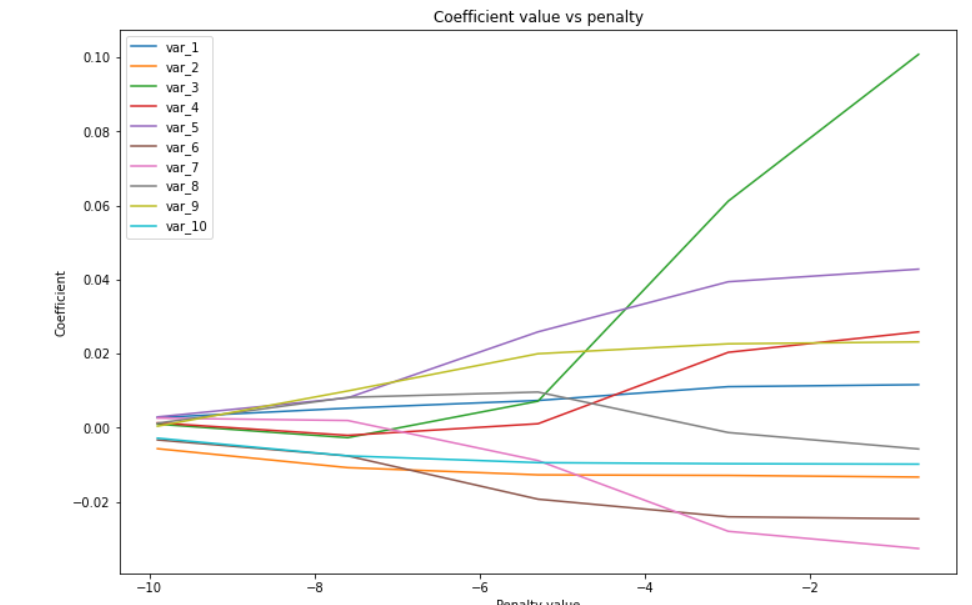

We can see that the relation among the coefficients is complex. Some features show bigger coefficients than others without regularisation, but when the penalty increases this relationship changes.

Some other features are very important (show big coefficients) without regularisation, but with regularization their importance is similar to that of other features.

**While this is not crucial to selet features, this is actually quite important when our aim is to understand the true relationship of a variable with the target. Or in other words, when we need to interpret and fully understand the outcome of the Linear Regression.**

# Putting it all together

* [Pipeline](https://github.com/solegalli/feature-selection-for-machine-learning/blob/main/08-Embedded-linear-coefficients/08.4-Basic-methods-plus-coefficients-pipeline.ipynb)